In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.7MB 5.2MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=3ea0b292ce840d9e2d113e6cfa86a57efa9ad301d3932449d9480c12265ef859
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
df_baby = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Baby_5.json', lines=True )
df_electronic = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Electronics_5.json', lines=True )
df_healthAnnPersonalCare = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Health_and_Personal_Care_5.json', lines=True )
df_sportsAndOutdoors = pd.read_json('/content/drive/MyDrive/COLAB/NLP/Practica/datasets/reviews_Sports_and_Outdoors_5.json', lines=True )

In [4]:
print(len(df_baby))
print(len(df_electronic))
print(len(df_healthAnnPersonalCare))
print(len(df_sportsAndOutdoors))

160792
1689188
346355
296337


In [5]:
df_baby = df_baby.iloc[:50000,]
df_baby.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0  A1HK2FQW6KXQB2  097293751X  ...     1373932800  07 16, 2013
1  A19K65VY14D13R  097293751X  ...     1372464000  06 29, 2013
2  A2LL1TGG90977E  097293751X  ...     1395187200  03 19, 2014
3   A5G19RYX8599E  097293751X  ...     1376697600  08 17, 2013
4   A2496A4EWMLQ7  097293751X  ...     1396310400   04 1, 2014

[5 rows x 9 columns]

In [6]:
df_electronic = df_electronic.iloc[:50000,]
df_electronic.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [7]:
df_healthAnnPersonalCare = df_electronic.iloc[:50000,]
df_healthAnnPersonalCare.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0   AO94DHGC771SJ  0528881469  ...     1370131200   06 2, 2013
1   AMO214LNFCEI4  0528881469  ...     1290643200  11 25, 2010
2  A3N7T0DY83Y4IG  0528881469  ...     1283990400   09 9, 2010
3  A1H8PY3QHMQQA0  0528881469  ...     1290556800  11 24, 2010
4  A24EV6RXELQZ63  0528881469  ...     1317254400  09 29, 2011

[5 rows x 9 columns]

In [8]:
df_sportsAndOutdoors = df_sportsAndOutdoors.iloc[:50000,]
df_sportsAndOutdoors.head()

reviewerID        asin  ... unixReviewTime   reviewTime
0    AIXZKN4ACSKI  1881509818  ...     1390694400  01 26, 2014
1  A1L5P841VIO02V  1881509818  ...     1328140800   02 2, 2012
2   AB2W04NI4OEAD  1881509818  ...     1330387200  02 28, 2012
3  A148SVSWKTJKU6  1881509818  ...     1328400000   02 5, 2012
4   AAAWJ6LW9WMOO  1881509818  ...     1366675200  04 23, 2013

[5 rows x 9 columns]

In [9]:
df_baby = df_baby[['reviewText']]
df_baby.dropna(inplace=True)

df_electronic = df_electronic[['reviewText']]
df_electronic.dropna(inplace=True)

df_healthAnnPersonalCare = df_healthAnnPersonalCare[['reviewText']]
df_healthAnnPersonalCare.dropna(inplace=True)

df_sportsAndOutdoors = df_sportsAndOutdoors[['reviewText']]
df_sportsAndOutdoors.dropna(inplace=True)

In [10]:
dfAll = [df_baby, df_electronic, df_healthAnnPersonalCare, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic, df_sportsAndOutdoors]
#dfAll = [df_baby, df_electronic]
df =pd.concat(dfAll)
df.dropna()
df.head()

reviewText
0  Perfect for new parents. We were able to keep ...
1  This book is such a life saver.  It has been s...
2  Helps me know exactly how my babies day has go...
3  I bought this a few times for my older son and...
4  I wanted an alternative to printing out daily ...

In [11]:
# PREPROCESADO
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [12]:
df.dropna()
processed_texts = []
for text in df['reviewText']:
    processed_texts.append(text_preprocessing(text))

In [13]:
processed_texts[:5]

[['perfect',
  'parents',
  'able',
  'track',
  'baby',
  'feeding',
  'sleep',
  'diaper',
  'change',
  'schedule',
  'half',
  'months',
  'life',
  'life',
  'easier',
  'doctor',
  'questions',
  'habits',
  'right'],
 ['book',
  'life',
  'saver',
  'helpful',
  'able',
  'track',
  'trends',
  'answer',
  'pediatrician',
  'questions',
  'communicate',
  'different',
  'times',
  'night',
  'newborn',
  'think',
  'things',
  'required',
  'leave',
  'hospital',
  'went',
  'pages',
  'newborn',
  'version',
  'moved',
  'infant',
  'version',
  'finish',
  'second',
  'infant',
  'book',
  'total',
  'right',
  'baby',
  'turns',
  'things',
  'haves',
  'baby'],
 ['helps',
  'know',
  'exactly',
  'babies',
  'gone',
  'mother',
  'watching',
  'work',
  'section',
  'write',
  'notes',
  'know',
  'need',
  'couldn',
  'happier',
  'book'],
 ['bought',
  'times',
  'older',
  'bought',
  'newborn',
  'super',
  'easy',
  'helps',
  'track',
  'daily',
  'routine',
  'started

In [14]:
dictionary = Dictionary(processed_texts)

In [15]:
list(dictionary.items())

[(0, 'able'),
 (1, 'baby'),
 (2, 'change'),
 (3, 'diaper'),
 (4, 'doctor'),
 (5, 'easier'),
 (6, 'feeding'),
 (7, 'habits'),
 (8, 'half'),
 (9, 'life'),
 (10, 'months'),
 (11, 'parents'),
 (12, 'perfect'),
 (13, 'questions'),
 (14, 'right'),
 (15, 'schedule'),
 (16, 'sleep'),
 (17, 'track'),
 (18, 'answer'),
 (19, 'book'),
 (20, 'communicate'),
 (21, 'different'),
 (22, 'finish'),
 (23, 'haves'),
 (24, 'helpful'),
 (25, 'hospital'),
 (26, 'infant'),
 (27, 'leave'),
 (28, 'moved'),
 (29, 'newborn'),
 (30, 'night'),
 (31, 'pages'),
 (32, 'pediatrician'),
 (33, 'required'),
 (34, 'saver'),
 (35, 'second'),
 (36, 'things'),
 (37, 'think'),
 (38, 'times'),
 (39, 'total'),
 (40, 'trends'),
 (41, 'turns'),
 (42, 'version'),
 (43, 'went'),
 (44, 'babies'),
 (45, 'couldn'),
 (46, 'exactly'),
 (47, 'gone'),
 (48, 'happier'),
 (49, 'helps'),
 (50, 'know'),
 (51, 'mother'),
 (52, 'need'),
 (53, 'notes'),
 (54, 'section'),
 (55, 'watching'),
 (56, 'work'),
 (57, 'write'),
 (58, 'better'),
 (59, 'bo

In [16]:
len(dictionary)

76185

In [17]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [18]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1),
  (1, 2),
  (9, 1),
  (13, 1),
  (14, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1)],
 [(19, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(17, 4),
  (29, 1),
  (38, 1),
  (43, 2),
  (49, 1),
  (50, 1),
  (53, 1),
  (56, 2),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)

In [19]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1)]

In [20]:
# Entrenamos el modelo (LDA)
# jugar con los topics
num_topics = 8

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [21]:
lda_model.show_topics()

[(0,
  '0.028*"great" + 0.018*"easy" + 0.018*"little" + 0.016*"nice" + 0.014*"light" + 0.013*"size" + 0.012*"small" + 0.012*"perfect" + 0.012*"love" + 0.012*"like"'),
 (1,
  '0.028*"pair" + 0.027*"sound" + 0.013*"camp" + 0.012*"headphones" + 0.010*"speakers" + 0.009*"noise" + 0.009*"radio" + 0.009*"loud" + 0.008*"hear" + 0.008*"range"'),
 (2,
  '0.018*"bike" + 0.010*"seat" + 0.009*"grip" + 0.008*"handle" + 0.008*"tool" + 0.007*"hand" + 0.007*"lock" + 0.007*"plastic" + 0.007*"tire" + 0.006*"rack"'),
 (3,
  '0.026*"case" + 0.020*"carry" + 0.018*"pocket" + 0.011*"belt" + 0.010*"small" + 0.008*"holster" + 0.008*"size" + 0.007*"leather" + 0.007*"useful" + 0.006*"battery"'),
 (4,
  '0.077*"knife" + 0.037*"water" + 0.029*"blade" + 0.022*"pump" + 0.022*"bottle" + 0.016*"clean" + 0.014*"steel" + 0.013*"cleaning" + 0.010*"sheath" + 0.010*"edge"'),
 (5,
  '0.039*"scope" + 0.036*"lens" + 0.032*"sharp" + 0.021*"shooting" + 0.019*"light" + 0.018*"range" + 0.017*"camera" + 0.014*"shoot" + 0.013*"shot

In [22]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01   Topic #02 Topic #03  ...   Topic #06 Topic #07  Topic #08
0         great        pair      bike  ...       scope      good      cable
1          easy       sound      seat  ...        lens      like       unit
2        little        camp      grip  ...       sharp     great      power
3          nice  headphones    handle  ...    shooting     price     switch
4         light    speakers      tool  ...       light   product      speed
5          size       noise      hand  ...       range      time       work
6         small       radio      lock  ...      camera    bought       home
7       perfect        loud   plastic  ...       shoot   quality     device
8          love        hear      tire  ...        shot    better     worked
9          like       range      rack  ...       field     works     cables
10         bike       music     place  ...     lantern      work    service
11  comfortable      player    knives  ...      filter      need      works
12         fits        sony     mount  ...       shots     years    support
13    recommend        bass      open  ...    pictures     thing      setup
14      camping     quality    easily  ...       yards     think    adapter
15       weight      volume     rifle  ...      lenses      sure    minutes
16        watch     control     metal  ...       focus      best    problem
17         ride     whistle     chain  ...  sharpening      know       pump
18         long        band     right  ...       canon      fine   problems
19         wear     playing      hold  ...       flash     going  batteries

[20 rows x 8 columns]

In [23]:
# Perplexity y Coherence
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 


Perplexity:  -8.207631336409346

Coherence Score:  0.49768825228191627


In [24]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.095854  0.184071       1        1  31.598077
0      0.006512  0.226994       2        1  16.488853
2     -0.063489  0.154389       3        1  13.184058
7      0.094265 -0.080037       4        1  10.245273
3      0.055054  0.043747       5        1   8.776869
1      0.126048 -0.232424       6        1   7.502116
5      0.103546 -0.189632       7        1   7.132563
4     -0.417790 -0.107108       8        1   5.072190, topic_info=         Term          Freq         Total Category  logprob  loglift
3234    knife  28427.000000  28427.000000  Default  30.0000  30.0000
311      good  69757.000000  69757.000000  Default  29.0000  29.0000
104     great  68345.000000  68345.000000  Default  28.0000  28.0000
32266   scope  20112.000000  20112.000000  Default  27.0000  27.0000
14693    lens  18558.000000  18558.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1744   blades   1242.892152   1354.864222   Topic8  -5.6993   2.8951
5038     heat   1866.551365   2640.221581   Topic8  -5.2926   2.6346
2597     cold   1865.415931   4582.394294   Topic8  -5.2932   2.0827
963    handle   1743.982741  10361.547692   Topic8  -5.3605   1.1995
548      tool   1335.208002   9948.177105   Topic8  -5.6276   0.9731

[440 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
3007       5  0.998790  accessories
5042       4  0.993951      adapter
5042       6  0.005732      adapter
1426       1  0.999911       amazon
59078      3  0.999420         ammo
...      ...       ...          ...
855        1  0.989559        years
855        2  0.002266        years
855        6  0.008069        years
879        5  0.999624       zipper
21303      7  0.999675         zoom

[728 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 3, 8, 4, 2, 6, 5])

In [25]:
pyLDAvis.save_html(vis, '/content/drive/MyDrive/COLAB/NLP/Practica/topics_vis_0.html')

In [26]:
# Número óptimo de topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [27]:
# Grid sobre el número de topics (puede tardar un buen rato)
start_ = 4
end_ = 10
step_ = 1

In [28]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

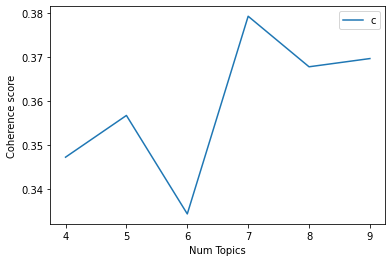

In [29]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [30]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic #01  Topic #02  Topic #03  ... Topic #07 Topic #08 Topic #09
0         watch      blade       good  ...     light     knife      good
1        riding      steel      price  ...     great     chain     great
2          good     knives      great  ...      lens      like     works
3          like       grip    quality  ...      good    pocket   product
4         great       hand       work  ...   quality     sharp      work
5        helmet   shooting      power  ...     price      edge      easy
6       bicycle       like      years  ...     bikes   holster      like
7   comfortable       ball     bought  ...     range      case     price
8          time    glasses       time  ...     shoot    saddle      need
9          head      years       unit  ...     socks      tape      lock
10        sound     handle    product  ...      like     small     scope
11       rounds      hands    battery  ...    camera   leather   quality
12       bought  stainless      works  ...     scope      need   plastic
13         long       good  batteries  ...     sharp      ants    bought
14         wear       best     amazon  ...   lantern      buck      time
15       better      right      range  ...    bright      want     mount
16       little      great     better  ...    mirror      open    little
17  backpacking     finger       home  ...    better      time    needed
18        price       love       camp  ...    bought      shot      tool
19     magazine      gauge       need  ...      nice    spring      fine

[20 rows x 9 columns]

In [31]:
# Topic dominante por texto
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [32]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [perfect, parents, able, track, baby, feeding,...
1            1  ...  [book, life, saver, helpful, able, track, tren...
2            2  ...  [helps, know, exactly, babies, gone, mother, w...
3            3  ...  [bought, times, older, bought, newborn, super,...
4            4  ...  [wanted, alternative, printing, daily, sheets,...
5            5  ...  [great, basics, wish, space, write, things, bi...
6            6  ...  [month, spend, half, days, mother, half, neigh...
7            7  ...  [book, perfect, time, book, easy, track, feedi...
8            8  ...  [wanted, love, pretty, expensive, months, wort...
9            9  ...  [baby, tracker, brand, books, absolute, best, ...

[10 rows x 5 columns]

In [33]:
# Distribución de topics en el corpus
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

topic  contribution
0    8.0      0.216000
1    2.0      0.188780
2    3.0      0.166345
3    6.0      0.118615
4    0.0      0.117575
5    5.0      0.060655
6    7.0      0.052650
7    4.0      0.042295
8    1.0      0.037085